# MSA 7B:(None Mass) Shooting Analysis: GVA Data Exploration (California, 2024)

In [32]:
import json
import pandas as pd
import numpy as np
import random
from pathlib import Path

import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import myst_nb
import wikipedia as wp
import math



## Loading Data & Formatting Dates for Analysis

In [33]:
# Disable scientific notation globally
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = False
mpl.rcParams['axes.formatter.limits'] = (-999, 999)  # forces normal numbers
random.seed(33)

In [34]:
df = pd.read_csv('MSA Data\GVA_California_24.csv')
scope = 'California, 2024'
len(df)

3165

In [35]:
df.head(3)

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,3106875,"December 31, 2024",California,Stockton,E March Ln and Holiday Dr,1,0,0,0,0,NaN
1,3106780,"December 31, 2024",California,Escondido,1100 block of E Third Ave,0,2,0,0,0,NaN
2,3106767,"December 31, 2024",California,Dinuba,40500 block of Rd 84,0,1,0,0,0,NaN


In [36]:
df.dtypes

Incident ID            int64
Incident Date         object
State                 object
City Or County        object
Address               object
Victims Killed         int64
Victims Injured        int64
Suspects Killed        int64
Suspects Injured       int64
Suspects Arrested      int64
Operations           float64
dtype: object

In [37]:
df['date'] = pd.to_datetime(df['Incident Date'], format = '%B %d, %Y', errors = 'coerce')

In [38]:
df = df.rename(columns={
    'City Or County': 'city',
    'Address': 'address',
    'Victims Killed': 'v_killed',
    'Victims Injured': 'v_injured',
    'Suspects Killed': 's_killed',
    'Suspects Injured': 's_injured',
    'Suspects Arrested': 's_arrested',
    'Incident ID': 'id'
    })
df.head(2)

,id,Incident Date,State,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,Operations,date
0,3106875,"December 31, 2024",California,Stockton,E March Ln and Holiday Dr,1,0,0,0,0,NaN,2024-12-31
1,3106780,"December 31, 2024",California,Escondido,1100 block of E Third Ave,0,2,0,0,0,NaN,2024-12-31


In [39]:
df['dow'] = df['date'].dt.day_name().str[:3]
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month_name().str[:3]
df['week'] = df['date'].dt.isocalendar().week
df['t_kill'] = df['v_killed'] + df['s_killed']
df['t_inj'] = df['v_injured'] + df['s_injured']
df['total'] = df['t_inj'] + df['t_kill']

In [40]:
df = df[[ 'date', 'dow','day', 'month', 'week','city', 'address', 'v_killed',
       'v_injured', 's_killed', 's_injured', 's_arrested', 't_kill', 't_inj', 'total', 'id']]
df.head(2)

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
0,2024-12-31,Tue,31,Dec,1,Stockton,E March Ln and Holiday Dr,1,0,0,0,0,1,0,1,3106875
1,2024-12-31,Tue,31,Dec,1,Escondido,1100 block of E Third Ave,0,2,0,0,0,0,2,2,3106780


## Largest Shooting Incidents in the State in 2024

In [41]:
df.nlargest(10, 'total').reset_index(drop=True)

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
0,2024-06-19,Wed,19,Jun,25,Oakland,400 block of Grand Ave,0,13,0,1,1,0,14,14,2944778
1,2024-03-03,Sun,3,Mar,9,King City,215 N 2nd St,4,7,0,0,3,4,7,11,2844405
2,2024-01-01,Mon,1,Jan,1,Los Angeles,2350 Porter St,2,8,0,0,0,2,8,10,2791411
3,2024-12-28,Sat,28,Dec,52,Signal Hill,1005 E Burnett St,1,6,0,0,0,1,6,7,3104385
4,2024-06-26,Wed,26,Jun,26,Lancaster,800 block of E Ave J-12,2,5,0,0,2,2,5,7,2951432
5,2024-05-04,Sat,4,May,18,Long Beach,2688 E South St,0,7,0,0,0,0,7,7,2900308
6,2024-10-27,Sun,27,Oct,43,Redding,21199 CA-299,1,5,0,0,1,1,5,6,3057339
7,2024-10-26,Sat,26,Oct,43,Fresno,L St and Amador St,0,6,0,0,0,0,6,6,3057300
8,2024-09-25,Wed,25,Sep,39,Los Angeles,449 W 74th St,0,6,0,0,4,0,6,6,3033981
9,2024-06-07,Fri,7,Jun,23,Compton,E Greenleaf Blvd and S Mayo Ave,1,5,0,0,0,1,5,6,2934007


## Shooting Incidents over the Calendar Year - 2024

In [42]:
day_colours = {
    "Mon": "#a2bffe",  # pastel blue
    "Tue": "#7af9ab",  # Sea Foam Green
    "Wed": "#ffff14",  # Yellow
    "Thu": "#fdaa48",  # Light Orange    
    "Fri": "#ff474c",  # Light Red
    "Sat": "#910951",  # Reddish Purple
    "Sun": "#632de9",  # Purple Blue
}

In [43]:
month_colours = {
    "Jan": "#4C72B0", "Feb": "#6BAED6", "Mar": "#9ECAE1",
    "Apr": "#41AB5D", "May": "#74C476", "Jun": "#A1D99B",
    "Jul": "#FEC44F", "Aug": "#FE9929", "Sep": "#EC7014",
    "Oct": "#E6550D", "Nov": "#A63603", "Dec": "#756BB1"
}

Text(0.5, 0, 'Month')

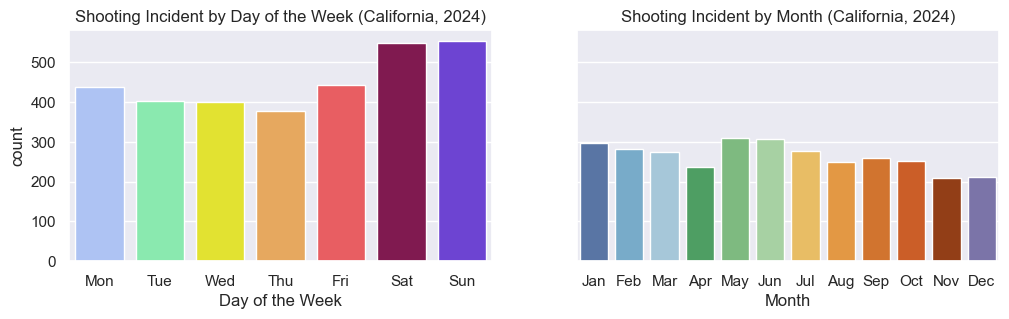

In [44]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

sns.countplot(df, x='dow', ax=ax1, palette = day_colours, hue='dow',
              order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
             ).set_title('Shooting Incident by Day of the Week (' + scope + ')')
ax1.set_xlabel("Day of the Week")

sns.countplot(df, x='month', ax=ax2,palette = month_colours, hue='month',
              order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov', 'Dec']
             ).set_title('Shooting Incident by Month (' + scope + ')')
ax2.set_xlabel("Month")
#plt.set_title('Mass Shooting Incident by Day of the Week & Month (\'14-\'24)')


**Day of the Week:** For all shooting incidents in California in 2024 we see the same kind of pattern over the week as we saw with the national level data for MSI over 10 years, with most occuring over the weekend and Sunday being the most frequent day. Although the general pattern is the same, there is much less difference between weekdays and the weekend, and Saturday and Sunday being almost level.

**Month of the Year:** In California, 2024 the pattern is slightly different over the year with a less pronounced peak in the Summer and many more incidents in the first 3 months of the year, when compared to the national data on MSIs (2014-24).

Text(0.5, 1.0, 'Shooting Incident by Week (California, 2024)')

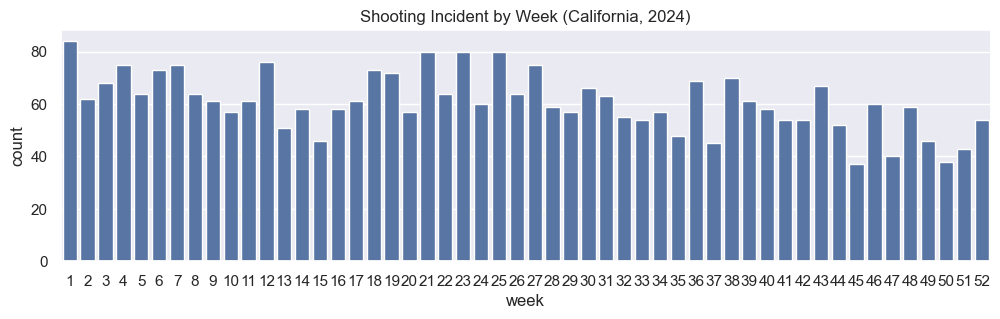

In [45]:
sns.set_theme()
plt.figure(figsize=(12,3))
sns.countplot(df, x='week', order=range(1,53), legend=False,).set_title('Shooting Incident by Week (' + scope + ')')

**Week # of the Year:** In 2024 in California, the first week of the year was the most dangerous for shooting incidents, closely followed by 3 odd weeks in the start of summer, numbered 21, 23 and 25.

Text(0.5, 1.0, 'Shooting Incident by Day of Month (California, 2024)')

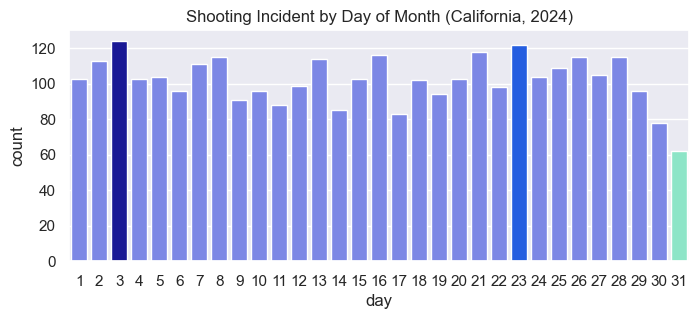

In [46]:
sns.set_theme()
plt.figure(figsize=(8,3))

all_days = sorted(df['day'].unique())
highlight_day = 31    
base_color = '#6a79f7'       # Cornflower Blue
highlight_color = "#7ef4cc" # Turquoise

day_palette = {day: base_color for day in all_days}
day_palette[highlight_day] = highlight_color
day_palette[23] = '#0652ff' # Electric Blue
day_palette[3] = '#0504aa' #Royal Blue

sns.countplot(df, x='day', order=range(1,32), palette=day_palette, hue = 'day', legend=False,).set_title('Shooting Incident by Day of Month (' + scope + ')')

**Day of the Month**
* In California in 2024 there were the highest number of shootings on the 3rd of the month. In the 10 year span of MSI data, the 4th was the date with most mass shooting incidents, mainly due to the 4th of July. Here we have the 3rd of the month, closely followed by the 23rd. Neither of which correspond to federal holidays in 2024. There are a number of dates that have a number of incidents close to the 3rd and 23rd, so without a clear date of most shootings those with more than the median may be due to a quirk of the calendar where certain dates may fall on a weekend more than others.
* N.B. Again the 31st has the fewest number of incidents due to there being fewer 31sts than any other date.

## Days of Rage - Dates of 2024 with the highest number of Shooting Incidents in the State

In [47]:
rage_days = df.groupby(['day','month','dow']).agg(
    no_inc = pd.NamedAgg(column="t_kill", aggfunc="count"),
    total_inj = pd.NamedAgg(column="t_inj", aggfunc="sum"),
    total_kld = pd.NamedAgg(column="t_kill", aggfunc="sum"), 
    total_inj_kill = pd.NamedAgg(column="total", aggfunc="sum")
).reset_index()
rage_days.nlargest(10, 'no_inc').reset_index(drop=True)

,day,month,dow,no_inc,total_inj,total_kld,total_inj_kill
0,23,Jun,Sun,22,20,9,29
1,5,May,Sun,21,17,7,24
2,22,Sep,Sun,18,14,10,24
3,26,Apr,Fri,18,12,8,20
4,26,May,Sun,18,14,7,21
5,9,Jun,Sun,17,14,3,17
6,11,Feb,Sun,17,17,12,29
7,18,Feb,Sun,17,17,5,22
8,25,Jan,Thu,17,16,4,20
9,28,Jan,Sun,17,13,7,20


**Day of the Year:** In 2024 in the state of California, there were the highest number of shooting incidents on the 23rd June, with one more incident than the 5th of May, both of which were Sundays as were eight of the first ten dates, curiously enough. It's also worth noting that the days of most incidents are spread across the year, unlike the data for Illinois, where most of the days are concentrated in the summer months. 

In [17]:
len(rage_days) # Check total of days that included a shooting incident as data started from incidents not dates.

366

Text(0.5, 0, 'Total Number of Incidents in a Day')

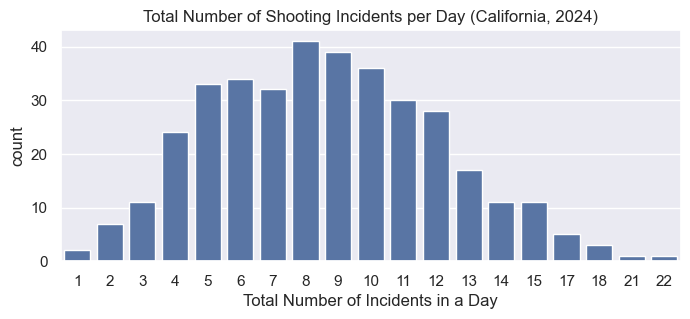

In [18]:
sns.set_theme()
plt.figure(figsize=(8,3))
sns.countplot(rage_days, x='no_inc').set_title('Total Number of Shooting Incidents per Day (' + scope + ')')
plt.xlabel ('Total Number of Incidents in a Day')

* The distribution of number of incidents in a day seems fairly normally distributed, although we do have a slightly longer tail to the right, this is to be expected as we can't have less than 0 incidents.
* This may reflect the relatively even distribution of incidents over the year when compared to Illinois where many more incidents are concentrated over the summer months.

In [23]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov', 'Dec']
rage_days['month'] = pd.Categorical(rage_days['month'], categories=months, ordered=True)
rage_days[(rage_days['day'] == 3)].sort_values(by='month')

,day,month,dow,no_inc,total_inj,total_kld,total_inj_kill
28,3,Jan,Wed,14,12,5,17
27,3,Feb,Sat,11,6,5,11
31,3,Mar,Sun,12,14,9,23
24,3,Apr,Wed,8,9,0,9
32,3,May,Fri,10,6,3,9
30,3,Jun,Mon,15,9,7,16
29,3,Jul,Wed,13,10,6,16
25,3,Aug,Sat,13,9,5,14
35,3,Sep,Tue,11,11,2,13
34,3,Oct,Thu,7,7,2,9


* We can see that there is no one one date amongst the 3rds that contributes a large number of incidents than the majority of the others with all months with the exception of December, falling in the range between 8 and 15 incidents.
* This trend is reflective of the more even distribution of incidents across the year in California.

## Analysis of number of Victims Killed and Injured per Shooting Incident

(-0.5, 4.5)

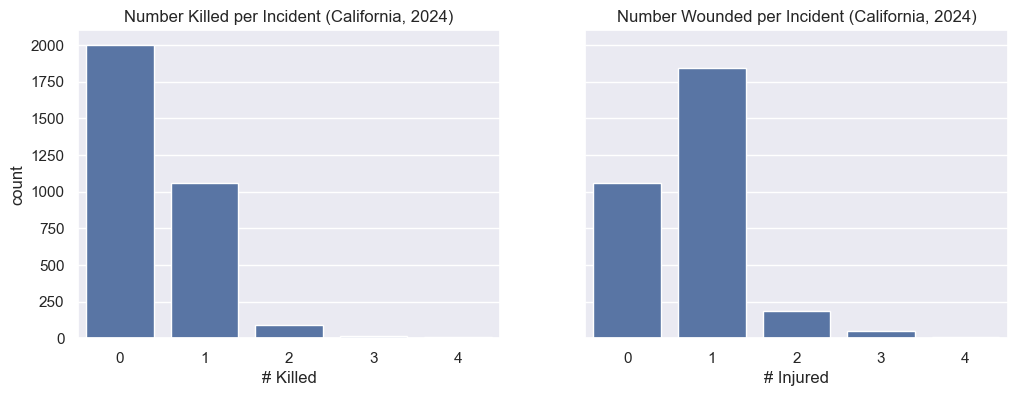

In [24]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.countplot(df, x='t_kill', ax=ax1).set_title('Number Killed per Incident (' + scope + ')')
ax1.set_xlabel("# Killed")
ax1.set_xlim(-0.5, 4.5)
sns.countplot(df, x='t_inj', ax=ax2).set_title('Number Wounded per Incident (' + scope + ')')
ax2.set_xlabel("# Injured")
ax2.set_xlim(-0.5, 4.5)

* **Good News**: In **63% of shooting incidents in California in 2024, no victims were killed** (2001/3165).
* **In a third of incidents no victims were injured**(33.5% or 1062/3165), although this **does not mean a victim wasn't killed** in the majority of these incidents.
* **Less Good News**: There are a relatively small number of incidents where nobody is injured or killed, and nobody arrested. Further information regarding these subgroups are presented below. 

In [48]:
df.t_kill.value_counts(), df.t_inj.value_counts()

(t_kill
 0    2001
 1    1056
 2      88
 3      12
 4       6
 5       1
 6       1
 Name: count, dtype: int64,
 t_inj
 1     1845
 0     1062
 2      186
 3       47
 4        9
 5        9
 6        3
 7        2
 14       1
 8        1
 Name: count, dtype: int64)

In [49]:
counts = pd.crosstab(df['v_killed'], df['v_injured'])

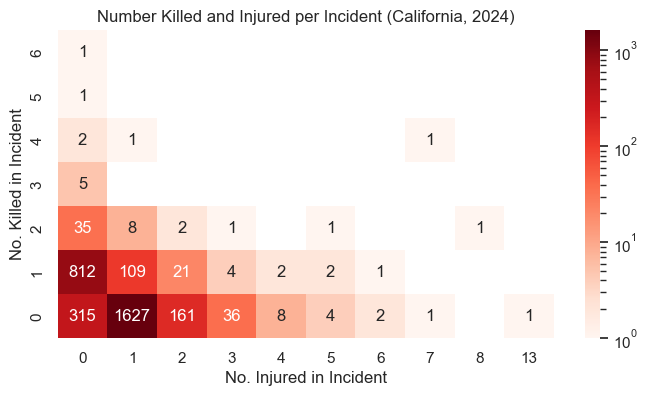

In [50]:
sns.set_style("white")
plt.figure(figsize=(8,4))
ax = sns.heatmap(counts, 
                 annot=True, 
                 fmt="d", 
                 norm=LogNorm(),
                 cmap="Reds")
ax.set_ylabel('No. Killed in Incident')
ax.set_xlabel('No. Injured in Incident')
ax.invert_yaxis()
plt.grid(False)
plt.title('Number Killed and Injured per Incident (' + scope + ')')
plt.show()

In [51]:
percentages = counts / len(df) * 100

In [52]:
perc_focus = percentages.loc[0:6, 0:10]

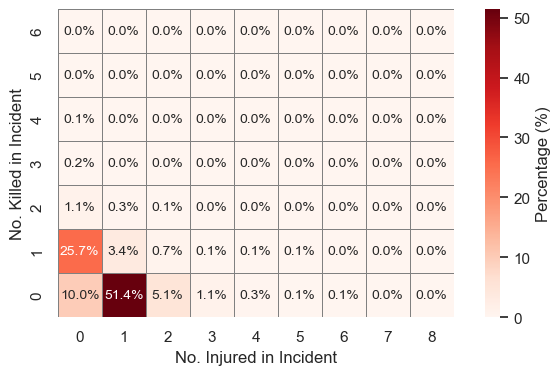

In [53]:
annot = perc_focus.map(lambda v: f"{v:.1f}%")

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(
    perc_focus,
    ax=ax,
    annot=annot,    # preformatted strings
    fmt='',         # use the strings exactly (no extra formatting)
    cmap='Reds',
    cbar_kws={'label': 'Percentage (%)'},
    square=True,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={'fontsize':10}
)

# flip so that the first row (y=0) appears at the bottom
ax.invert_yaxis()
ax.set_ylabel('No. Killed in Incident')
ax.set_xlabel('No. Injured in Incident')
plt.show()

* As we can see the actual **overall percentage of incidents that involve no victims getting injured or being killed was 10%** in California in 2024.
* **Over half (51.4%) of the incidents involve one victim being injured and nobody dying**.

In [54]:
s_counts = pd.crosstab(df['s_killed'], df['s_injured'])

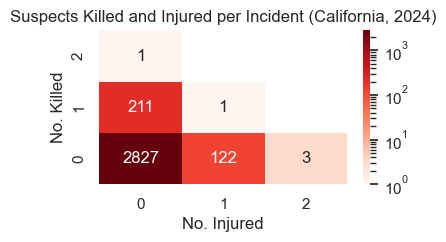

In [55]:
sns.set_style("white")
plt.figure(figsize=(4,2))
ax = sns.heatmap(s_counts, 
                 annot=True, 
                 fmt="d", 
                 norm=LogNorm(),
                 cmap="Reds")
ax.set_ylabel('No. Killed')
ax.set_xlabel('No. Injured')
ax.invert_yaxis()
plt.grid(False)
plt.title('Suspects Killed and Injured per Incident (' + scope + ')')
plt.show()

In [56]:
sia_counts = pd.crosstab(df['s_injured'], df['s_arrested'])

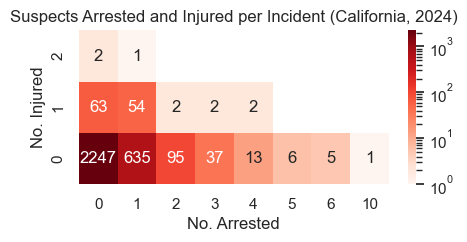

In [58]:
sns.set_style("white")
plt.figure(figsize=(5,2))
ax = sns.heatmap(sia_counts, 
                 annot=True, 
                 fmt="d", 
                 norm=LogNorm(),
                 cmap="Reds")
ax.set_ylabel('No. Injured')
ax.set_xlabel('No. Arrested')
ax.invert_yaxis()
plt.grid(False)
plt.title('Suspects Arrested and Injured per Incident (' + scope + ')')
plt.show()

In [59]:
no_vict = df[(df['v_killed'] == 0) & (df['v_injured'] == 0)]
no_vict.sample(5)

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
2789,2024-02-09,Fri,9,Feb,6,Hollister,421 Hillcrest Rd,0,0,1,0,0,1,0,1,2825200
1796,2024-05-28,Tue,28,May,22,Hayward,NaN,0,0,0,0,0,0,0,0,2936956
48,2024-12-27,Fri,27,Dec,52,Anaheim,1200 block of E South St,0,0,1,0,0,1,0,1,3103680
594,2024-10-11,Fri,11,Oct,41,Fresno,S Whitney Ave and E Hoxie Ave,0,0,0,1,1,0,1,1,3045791
3013,2024-01-18,Thu,18,Jan,3,Bakersfield,1300 block of Chester Ave,0,0,1,0,0,1,0,1,2804057


* 4 of the 5 cases above involved defensive use of firearms to prevent a crime, by either potential victims of the crime or responding police officers.
* The other is a case of a child threatening someone with a gun in an online video chat. 

In [60]:
sus_counts = pd.crosstab(no_vict['s_killed'], no_vict['s_injured'])

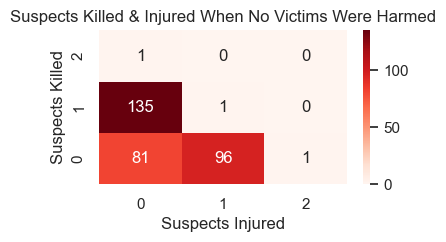

In [61]:
plt.figure(figsize=(4,2))
ax = sns.heatmap(sus_counts, 
                 annot=True, 
                 fmt="d", 
                 cmap="Reds")

ax.invert_yaxis()
ax.set_ylabel('Suspects Killed')
ax.set_xlabel('Suspects Injured')
plt.title('Suspects Killed & Injured When No Victims Were Harmed')
plt.show()

In [62]:
justice = no_vict[(no_vict.s_arrested > 1)]
justice.nlargest(5, 's_arrested')

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
2360,2024-03-25,Mon,25,Mar,13,Poway,13550 Danielson St,0,0,0,0,10,0,0,0,2863849
1335,2024-07-13,Sat,13,Jul,28,Orange,358 S Tustin St,0,0,0,0,6,0,0,0,2967980
1453,2024-07-01,Mon,1,Jul,27,Camarillo,1780 Ventura Blvd,0,0,0,0,6,0,0,0,2955501
1578,2024-06-18,Tue,18,Jun,25,Riverside,10031 Indiana Ave,0,0,0,0,6,0,0,0,2969647
1597,2024-06-17,Mon,17,Jun,25,Oceanside,1906 Oceanside Blvd,0,0,0,0,6,0,0,0,2950683


* The first incident above involved a gang robbery of guns involving ramming a vehicle into the store. 10 members of the gang were later arrested. The report also revealed that the group had stolen over 300 firearms over the previous 6 months. 

In [63]:
no_harm_done = no_vict[(no_vict['s_killed'] == 0) & (no_vict['s_injured'] == 0) & (no_vict['s_arrested'] == 0)]
no_harm_done.sample(5)

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
2107,2024-04-26,Fri,26,Apr,17,Lynwood,11300 Spruce St,0,0,0,0,0,0,0,0,2891393
3099,2024-01-08,Mon,8,Jan,2,Oakland,4104 International Blvd,0,0,0,0,0,0,0,0,2797990
662,2024-10-02,Wed,2,Oct,40,Petaluma,680 Sonoma Mountain Pkwy,0,0,0,0,0,0,0,0,3041649
1228,2024-07-26,Fri,26,Jul,30,Los Angeles,3401 Manning Ave,0,0,0,0,0,0,0,0,2980661
2409,2024-03-21,Thu,21,Mar,12,Pomona,100 Diamond Ranch Rd,0,0,0,0,0,0,0,0,2859687


**Nobody Hurt:** Of the incidents that involved no one getting hurt or arrested, a quick review of a sample of incidents would appear to fit with the analysis of Illinois, where most of the incidents of this type tend to be **defensive use of a firearm** to prevent a crime, or **guns taken into schools**, but not fired. From the 5 incidents above 3 involved guns being taken into school but not fired, and 2 were self-defense/prevention of a crime by wouldbe victims.


**Example:** "Student accidentally brought his father's backpack to school instead of his own. Student immediately notified the teacher. Father's backpack contained a handgun and a loaded magazine. Gun is registered." *(Incident No. 3071543)*